In [1]:
import os
from os.path import exists
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
optimizer_name = tf.keras.optimizers.Adam()

In [ ]:
data_dir = os.getcwd() + "/data/"
data_dir = pathlib.Path(data_dir)
print(data_dir)

x:\valleytest\data


In [ ]:
data_image_count = len(list(data_dir.glob('*/*.jpg')))
print(f'{data_image_count} training images.')

328 training images.


In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 328 files belonging to 5 classes.
Using 263 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 328 files belonging to 5 classes.
Using 65 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['adidas', 'billabong', 'nike', 'nike sb', 'puma']


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [ ]:
num_classes = len(class_names)

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes),
  layers.Dense(6, input_dim=6, activation='relu'),
  layers.Dense(6, activation='relu'),
  layers.Dense(1, activation=None)
])

In [ ]:
model.compile(optimizer=optimizer_name,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [ ]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
9/9 [==============================] - 5s 414ms/step - loss: -1.9084 - accuracy: 0.1901 - val_loss: -10.5572 - val_accuracy: 0.2154
Epoch 2/15
9/9 [==============================] - 4s 430ms/step - loss: -12.3501 - accuracy: 0.1977 - val_loss: -10.5572 - val_accuracy: 0.2154
Epoch 3/15
9/9 [==============================] - 4s 477ms/step - loss: -12.3501 - accuracy: 0.1977 - val_loss: -10.5572 - val_accuracy: 0.2154
Epoch 4/15
9/9 [==============================] - 4s 427ms/step - loss: -12.3501 - accuracy: 0.1977 - val_loss: -10.5572 - val_accuracy: 0.2154
Epoch 5/15
9/9 [==============================] - 4s 442ms/step - loss: -12.3501 - accuracy: 0.1977 - val_loss: -10.5572 - val_accuracy: 0.2154
Epoch 6/15
9/9 [==============================] - 4s 452ms/step - loss: -12.3501 - accuracy: 0.1977 - val_loss: -10.5572 - val_accuracy: 0.2154
Epoch 7/15
9/9 [==============================] - 4s 412ms/step - loss: -12.3501 - accuracy: 0.1977 - val_loss: -10.5572 - val_accuracy: 

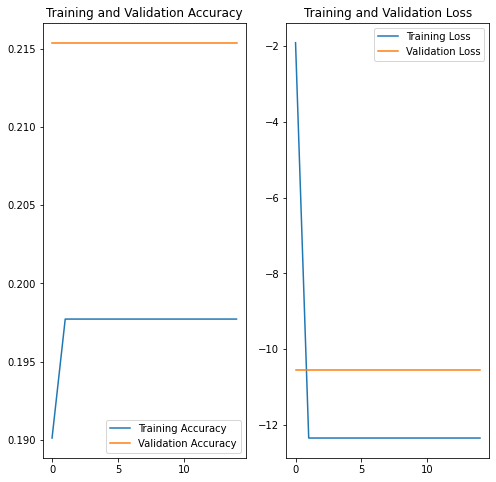

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
def check_for_logo(image_url):
    if(exists(os.getcwd() + "/datasets/data")):
        os.remove(os.getcwd() + "/datasets/data")
    image_path = tf.keras.utils.get_file('data', origin=image_url, cache_dir=os.getcwd())

    img = tf.keras.utils.load_img(
        image_path, target_size=(img_height, img_width)
    )
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    # print(
    #     "This image most likely belongs to {} with a {:.2f} percent confidence."
    #     .format(class_names[np.argmax(score)], 100 * np.max(score))
    # )
    
    return class_names[np.argmax(score)]

In [ ]:
correctness = 0

In [ ]:
# nike SB
image_url = "https://i.pinimg.com/originals/97/32/39/973239ad30b6ae553b895ad2f33ab4c2.png"
returned = check_for_logo(image_url)

if(returned == "nike sb"):
    correctness += 1
print(returned)

49152/34123 [===========================================] - 0s 0us/step
adidas


In [ ]:
# nike SB 2
image_url = "https://www.dafont.com/forum/attach/orig/8/4/846787.png"
returned = check_for_logo(image_url)

if(returned == "nike sb"):
    correctness += 1
print(returned)

114688/103287 [=================================] - 0s 0us/step
adidas


In [ ]:
# Puma
image_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRaudvEIjh6VdvXVB2Rtugdm7hANKwhy0kawg&usqp=CAU"
returned = check_for_logo(image_url)

if(returned == "puma"):
    correctness += 1
print(returned)

16384/2960 [======================================================================================================================================================================] - 0s 0s/step
adidas


In [ ]:
# Puma 2
image_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR7X7lgjgAZjap8tiHbky1gaQCxoRFkWQpfxw&usqp=CAU"
returned = check_for_logo(image_url)

if(returned == "puma"):
    correctness += 1
print(returned)

16384/6853 [=======================================================================] - 0s 0s/step
adidas


In [ ]:
# Adidas
image_url = "https://velo-badminton.nl/wp-content/uploads/2019/08/adidas_logo1.png"
returned = check_for_logo(image_url)

if(returned == "adidas"):
    correctness += 1
print(returned)

49152/33614 [===========================================] - 0s 0us/step
adidas


In [ ]:
# Adidas 2
image_url = "https://i.pinimg.com/550x/f0/4b/08/f04b08afcbef3dd40ef1e692d8443ec1.jpg"
returned = check_for_logo(image_url)

if(returned == "adidas"):
    correctness += 1
print(returned)

40960/27972 [===========================================] - 0s 0us/step
adidas


In [ ]:
# Nike
image_url = "https://c.static-nike.com/a/images/w_1920,c_limit/mdbgldn6yg1gg88jomci/image.jpg"
returned = check_for_logo(image_url)

if(returned == "nike"):
    correctness += 1
print(returned)

24576/14573 [==================================================] - 0s 0us/step
adidas


In [ ]:
# Nike 2
image_url = "https://i.pinimg.com/originals/5a/a8/78/5aa878fed3b5eae23461914a6ddedbb7.jpg"
returned = check_for_logo(image_url)

if(returned == "nike"):
    correctness += 1
print(returned)

212992/199997 [===============================] - 0s 0us/step
adidas


In [ ]:
# Billabong
image_url = "https://www.nicepng.com/png/full/215-2158246_billabong-logo.png"
returned = check_for_logo(image_url)

if(returned == "billabong"):
    correctness += 1
print(returned)


32768/18468 [=====================================================] - 0s 0us/step
adidas


In [ ]:
# Billabong 2
image_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQoZr78-oDhXa7970x6ZNCoiEVP98PF5-uwuA&usqp=CAU"
returned = check_for_logo(image_url)

if(returned == "billabong"):
    correctness += 1
print(returned)

16384/2047 [================================================================================================================================================================================================================================================] - 0s 0s/step
adidas


In [ ]:
print(f"model predicted {correctness} out of 10 correctly.")

model predicted 2 out of 10 correctly.
